RESUME EXTRACTOR CLASS

In [23]:
import pdfplumber
import re
import docx2txt
from datetime import datetime

class ResumeExtractor:
    def __init__(self, file_path):
        self.file_path = file_path
        self.text = self.extract_text()

    def extract_text(self):
        if self.file_path.endswith(".pdf"):
            with pdfplumber.open(self.file_path) as pdf:
                return " ".join(page.extract_text() for page in pdf.pages if page.extract_text())
        elif self.file_path.endswith(".docx"):
            return docx2txt.process(self.file_path)
        raise ValueError("Unsupported file format. Use PDF or DOCX.")

    def extract_email(self):
        match = re.search(r'[\w\.-]+@[\w\.-]+', self.text)
        return match.group(0) if match else None

    def extract_phone(self):
        match = re.search(r'\+?\d[\d -]{8,}\d', self.text)
        return match.group(0) if match else None

    def extract_skills(self, predefined_skills):
        return [skill for skill in predefined_skills if skill.lower() in self.text.lower()]

    def extract_date(self, date_str):
        for fmt in ["%B %Y", "%b %Y"]:
            try:
                return datetime.strptime(date_str.strip(), fmt)
            except ValueError:
                continue
        raise ValueError(f"Invalid date format: {date_str}")

    def extract_experience(self):
        matches = re.findall(r'([A-Za-z]+\s*\d{4})\s*-\s*([A-Za-z]+\s*\d{4}|Present)', self.text)
        total_months, now = 0, datetime.now()

        for start, end in matches:
            try:
                start_date = self.extract_date(start)
                end_date = now if "Present" in end else self.extract_date(end)
                total_months += (end_date.year - start_date.year) * 12 + (end_date.month - start_date.month)
            except ValueError:
                continue

        return round(total_months / 12, 1)

    def extract_details(self, predefined_skills):
        return {
            "email": self.extract_email(),
            "phone": self.extract_phone(),
            "skills": self.extract_skills(predefined_skills),
            "experience": self.extract_experience()
        }

if __name__ == "__main__":
    file_path = "C:/Users/shuraj/Downloads/Black and White Simple Business School Graduate Corporate Resume.pdf"
    predefined_skills = [
        "Process Improvement", "Data-driven Strategic Planning", "Cost-Benefit Analysis",
        "Report Writing", "Critical Thinking", "Communication Skills", "Interpersonal Skills",
        "Project Management", "Organizational Skills"
    ]

    resume_data = ResumeExtractor(file_path).extract_details(predefined_skills)

    print("\nResume Data:")
    print(f"  Email: {resume_data['email']}")
    print(f"  Phone: {resume_data['phone']}")
    print("  Skills:")
    for skill in resume_data["skills"]:
        print(f"    - {skill}")
    print(f"  Experience: {resume_data['experience']} years")



Resume Data:
  Email: hello@reallygreatsite.com
  Phone: +123-456-7890
  Skills:
    - Process Improvement
    - Data-driven Strategic Planning
    - Cost-Benefit Analysis
    - Report Writing
    - Critical Thinking
    - Communication Skills
    - Interpersonal Skills
    - Project Management
  Experience: 4.5 years


JOB DESCRIPTION CLASS

In [5]:
class JobExtractor:
    def __init__(self, title, required_skills, min_experience):
        self.title = title
        self.required_skills = required_skills
        self.min_experience = min_experience

    def extract_requirements(self):
        return {
            "title": self.title,
            "required_skills": self.required_skills,
            "min_experience": self.min_experience
        }

if __name__ == "__main__":
    file_path = "C:/Users/shuraj/Downloads/Black and White Simple Business School Graduate Corporate Resume.pdf"
    predefined_skills = [
        "Process Improvement", "Data-driven Strategic Planning", "Cost-Benefit Analysis",
        "Report Writing", "Critical Thinking", "Communication Skills", "Interpersonal Skills",
        "Project Management", "Organizational Skills"]

    resume_data = ResumeExtractor(file_path).extract_details(predefined_skills)
    job_data = JobExtractor(
        "Business Analyst",
        [
            "Process Improvement", "Data-driven Strategic Planning", "Cost-Benefit Analysis",
            "Report Writing", "Critical Thinking", "Communication Skills", "Interpersonal Skills",
            "Project Management", "Organizational Skills"],2).extract_requirements()

    print("\nResume Data:")
    print(f"  Email: {resume_data['email']}")
    print(f"  Phone: {resume_data['phone']}")
    print("  Skills:")
    for skill in resume_data["skills"]:
        print(f"    - {skill}")
    print(f"  Experience: {resume_data['experience']} years")

    print("\nJob Description:")
    print(f"  Title: {job_data['title']}")
    print("  Required Skills:")
    for skill in job_data["required_skills"]:
        print(f"    - {skill}")
    print(f"  Minimum Experience: {job_data['min_experience']} years")



Resume Data:
  Email: hello@reallygreatsite.com
  Phone: +123-456-7890
  Skills:
    - Process Improvement
    - Data-driven Strategic Planning
    - Cost-Benefit Analysis
    - Report Writing
    - Critical Thinking
    - Communication Skills
    - Interpersonal Skills
    - Project Management
  Experience: 4.5 years

Job Description:
  Title: Business Analyst
  Required Skills:
    - Process Improvement
    - Data-driven Strategic Planning
    - Cost-Benefit Analysis
    - Report Writing
    - Critical Thinking
    - Communication Skills
    - Interpersonal Skills
    - Project Management
    - Organizational Skills
  Minimum Experience: 2 years


RESUME SCORER CLASS


Resume Match Score: 16.81%


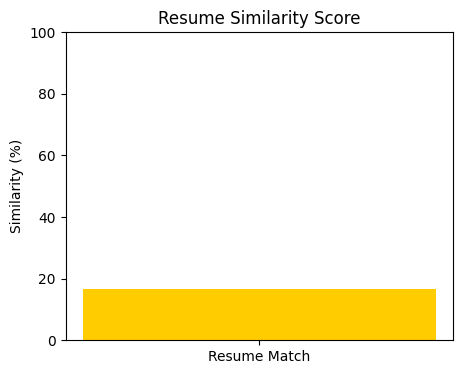

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt

class ResumeScorer:
    def __init__(self, file_path, predefined_skills, job_description):
        self.resume_extractor = ResumeExtractor(file_path)
        self.skills_list = predefined_skills
        self.job_description = job_description

    def compute_similarity(self):
        resume_details = self.resume_extractor.extract_details(self.skills_list)
        resume_text = " ".join(resume_details["skills"])  # Convert skills list to string

        vectorizer = TfidfVectorizer()
        documents = [resume_text, self.job_description]
        tfidf_matrix = vectorizer.fit_transform(documents)
        similarity_score = cosine_similarity(tfidf_matrix)[0, 1]

        return round(similarity_score * 100, 2)  # Convert to percentage

    def plot_similarity(self):
        score = self.compute_similarity()
        plt.figure(figsize=(5, 4))
        plt.bar(["Resume Match"], [score], color=['#ffcc00'])
        plt.ylim(0, 100)
        plt.title("Resume Similarity Score")
        plt.ylabel("Similarity (%)")
        plt.show()

# Example Usage
if __name__ == "__main__":
    job_desc = "Looking for a Business Analyst with expertise in Process Improvement, Data Analysis, and Project Management."
    file_path = "C:/Users/shuraj/Downloads/Black and White Simple Business School Graduate Corporate Resume.pdf"
    
    predefined_skills = [
        "Process Improvement", "Data-driven Strategic Planning", "Machine Learning",
        "Report Writing", "Organizational Skills"
    ]

    resume_scorer = ResumeScorer(file_path, predefined_skills, job_desc)
    match_score = resume_scorer.compute_similarity()
    
    print(f"\nResume Match Score: {match_score}%")
    resume_scorer.plot_similarity()


RESUME SCORER FOR MULTIPLE CANDIDATES


Ranked Candidates:
  Candidate 1: 26.53% match
  Candidate 2: 15.85% match
  Candidate 3: 0.0% match
Report saved as shortlisted_candidates.csv


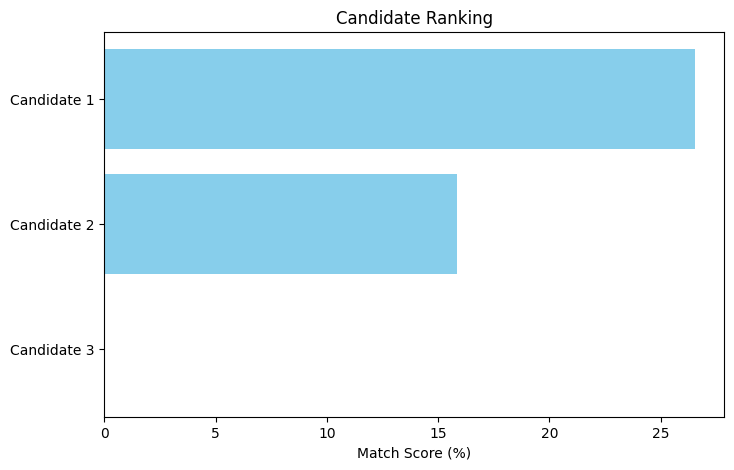

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import matplotlib.pyplot as plt

class ResumeScorer:
    def __init__(self, job_description):
        self.job_description = job_description

    def compute_similarity(self, resume_texts):
        if not resume_texts:
            return []  # Return empty list if no resumes are provided

        documents = [self.job_description] + resume_texts
        vectorizer = TfidfVectorizer()
        tfidf_matrix = vectorizer.fit_transform(documents)
        similarity_scores = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:])[0]
        return similarity_scores

    def rank_candidates(self, candidates):
        if not candidates:
            print("No candidates provided.")
            return []

        candidate_texts = [" ".join(candidate.get("skills", [])) for candidate in candidates]
        scores = self.compute_similarity(candidate_texts)

        for i, candidate in enumerate(candidates):
            candidate["score"] = round(scores[i] * 100, 2) if i < len(scores) else 0  # Avoid index error

        return sorted(candidates, key=lambda x: x["score"], reverse=True)

    def generate_report(self, ranked_candidates):
        if not ranked_candidates:
            print("No candidates to generate a report for.")
            return

        df = pd.DataFrame(ranked_candidates)
        df.to_csv("shortlisted_candidates.csv", index=False)
        print("Report saved as shortlisted_candidates.csv")

        # Plot Bar Chart
        names = [f"Candidate {i+1}" for i in range(len(ranked_candidates))]
        scores = [candidate["score"] for candidate in ranked_candidates]
        plt.figure(figsize=(8, 5))
        plt.barh(names, scores, color='skyblue')
        plt.xlabel("Match Score (%)")
        plt.title("Candidate Ranking")
        plt.gca().invert_yaxis()  # Highest score on top
        plt.show()

# Example Usage
if __name__ == "__main__":
    job_description = "Looking for a Business Analyst with expertise in Process Improvement, Data Analysis, and Project Management."
    
    candidates = [
        {"skills": ["Process Improvement", "Data-driven Strategic Planning", "Cost-Benefit Analysis"]},
        {"skills": ["Critical Thinking", "Communication Skills", "Project Management"]},
        {"skills": ["Python", "Machine Learning"]}  # This candidate is irrelevant and should score lower
    ]

    scorer = ResumeScorer(job_description)
    ranked_candidates = scorer.rank_candidates(candidates)

    print("\nRanked Candidates:")
    for i, candidate in enumerate(ranked_candidates, start=1):
        print(f"  Candidate {i}: {candidate['score']}% match")

    scorer.generate_report(ranked_candidates)


In [ ]:
CREATING DASHBOARD (INPUTS GIVEN)

In [13]:
import dash
from dash import dcc, html, Input, Output
import pandas as pd
import plotly.express as px

# Sample ranked candidate data
data = {
    "Candidate": ["Alice", "Bob", "Charlie", "David"],
    "Score": [95, 90, 85, 80],
    "Skills Matched": [7, 6, 5, 4],
}
df = pd.DataFrame(data)

# Initialize Dash app
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("AI Resume Screener Dashboard"),
    dcc.Graph(id="score-bar-chart"),
    dcc.Dropdown(
        id="candidate-dropdown",
        options=[{"label": i, "value": i} for i in df["Candidate"]],
        value="Alice",
    ),
    html.Div(id="candidate-info"),
])

@app.callback(
    Output("score-bar-chart", "figure"),
    Output("candidate-info", "children"),
    Input("candidate-dropdown", "value")
)
def update_graph(selected_candidate):
    fig = px.bar(df, x="Candidate", y="Score", title="Candidate Scores")
    selected_row = df[df["Candidate"] == selected_candidate].iloc[0]
    info = f"{selected_candidate} matched {selected_row['Skills Matched']} skills."
    return fig, info

if __name__ == '__main__':
    app.run(debug=True)



RESUME SCREENING REPORT GENERATION

In [14]:
from fpdf import FPDF

def generate_pdf(df, filename="resume_screening_report.pdf"):
    pdf = FPDF()
    pdf.set_auto_page_break(auto=True, margin=15)
    pdf.add_page()
    pdf.set_font("Arial", "B", 16)
    pdf.cell(200, 10, "Resume Screening Report", ln=True, align="C")
    pdf.ln(10)

    pdf.set_font("Arial", size=12)
    for i, row in df.iterrows():
        pdf.cell(200, 10, f"{row['Candidate']} - Score: {row['Score']}", ln=True)
    
    pdf.output(filename)
    print(f"PDF saved as {filename}")

# Example Usage
generate_pdf(df)


PDF saved as resume_screening_report.pdf


CONVERTED TO EXCEL

In [15]:
df.to_excel("resume_screening_results.xlsx", index=False)
print("Excel file saved as resume_screening_results.xlsx")


Excel file saved as resume_screening_results.xlsx


VIEWING THE EXCEL DETAILS

In [16]:
import pandas as pd

try:
    df = pd.read_excel("resume_screening_results.xlsx")
    print(df.head()) 
except Exception as e:
    print("Error reading the file:", e)


  Candidate  Score  Skills Matched
0     Alice     95               7
1       Bob     90               6
2   Charlie     85               5
3     David     80               4


SENDING MAIL TO THE SELECTED CANDIDATE

In [21]:
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart

# Your email credentials
EMAIL = "shurajpranuv@gmail.com"
PASSWORD = "hjbw izof mhkd enuv"

def send_email(candidate_email, candidate_name, score):
    subject = "Congratulations! You are shortlisted"
    body = f"Dear {candidate_name},\n\nCongratulations! You have been shortlisted with a score of {score}.\n\nBest Regards,\nRecruitment Team"

    msg = MIMEMultipart()
    msg["From"] = EMAIL
    msg["To"] = candidate_email
    msg["Subject"] = subject
    msg.attach(MIMEText(body, "plain"))

    try:
        server = smtplib.SMTP("smtp.gmail.com", 587)
        server.starttls()
        server.login(EMAIL, PASSWORD)
        server.sendmail(EMAIL, candidate_email, msg.as_string())
        server.quit()
        print(f"Email sent to {candidate_email}")
    except Exception as e:
        print(f"Error sending email: {e}")

# Example Usage
send_email("shurajpranuv@gmail.com", "Alice", 95)


Email sent to prithikavinodkumaar@gmail.com
